# Pràctica 1: Exercici exploratori

Instalació de llibreries i comprovació de les dades:

In [ ]:
library(ggplot2)
library(dplyr)

binge = read.csv("binge_drinking.csv")
any_drinking = data = read.csv("any_drinking.csv")

head(binge, 5)
head(any_drinking, 5)

,state,location,both_sexes_2002,females_2002,males_2002,both_sexes_2003,females_2003,males_2003,both_sexes_2004,females_2004,⋯,males_2009,both_sexes_2010,females_2010,males_2010,both_sexes_2011,females_2011,males_2011,both_sexes_2012,females_2012,males_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,United States,17.3,10.8,24.1,17.8,11.2,24.7,17.1,10.7,⋯,23.8,17.8,11.8,24.0,19.0,12.8,25.6,18.3,12.4,24.5
2,Alabama,Alabama,13.2,6.3,20.4,13.1,6.6,19.8,13.2,6.7,⋯,19.4,13.4,7.8,19.1,14.7,8.9,20.7,13.4,7.9,19.1
3,Alabama,Autauga County,13.6,6.6,20.8,13.3,6.9,20.0,13.0,6.5,⋯,18.8,13.3,7.9,18.8,14.4,8.8,20.1,13.2,7.9,18.7
4,Alabama,Baldwin County,17.9,9.7,26.4,17.4,9.8,25.3,17.4,9.5,⋯,24.2,16.7,9.9,23.7,18.6,11.7,25.8,16.9,10.4,23.7
5,Alabama,Barbour County,12.8,5.4,20.4,12.5,5.6,19.6,12.1,5.2,⋯,18.3,12.7,5.9,19.8,13.5,6.3,21.0,12.4,5.4,19.6


,state,location,both_sexes_2002,females_2002,males_2002,both_sexes_2003,females_2003,males_2003,both_sexes_2004,females_2004,⋯,males_2009,both_sexes_2010,females_2010,males_2010,both_sexes_2011,females_2011,males_2011,both_sexes_2012,females_2012,males_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,United States,55.4,47.5,63.7,56.6,48.9,64.6,55.2,47.6,⋯,63.3,56.1,49.3,63.2,57.1,50.6,63.9,56.0,49.1,63.0
2,Alabama,Alabama,40.7,32.1,49.6,42.3,33.8,51.2,41.0,32.9,⋯,49.0,42.5,35.3,50.1,44.8,37.3,52.5,43.6,36.5,51.0
3,Alabama,Autauga County,39.4,29.4,49.7,40.6,31.0,50.6,39.2,30.1,⋯,49.2,42.5,34.4,50.9,43.6,35.4,52.0,42.5,34.4,50.9
4,Alabama,Baldwin County,54.0,45.7,62.5,54.9,47.0,63.2,53.1,45.2,⋯,61.5,54.6,47.3,62.1,57.0,50.0,64.3,55.7,48.8,62.8
5,Alabama,Barbour County,36.0,27.3,45.0,37.9,29.2,46.9,35.8,27.4,⋯,43.5,38.6,30.2,47.4,39.4,31.0,48.2,37.6,29.2,46.3


PART 1

In [ ]:
# Ex. 1.1:  Extraieu el dataframe amb columnes ‘estat (State)’ i ‘ubicació (location)’ que
# contingui tota la informació referent a l’any 2012

any_2012 <- any_drinking[, c("state", "location", "both_sexes_2012", "females_2012", "males_2012")]

head(any_2012, 5)

# Dimensions dataframe
num_obs <- nrow(any_2012)
num_vars <- ncol(any_2012)
cat("Nombre d' observacions:", num_obs, "\n")
cat("Variables:", num_vars, "\n")


,state,location,both_sexes_2012,females_2012,males_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,National,United States,56.0,49.1,63.0
2,Alabama,Alabama,43.6,36.5,51.0
3,Alabama,Autauga County,42.5,34.4,50.9
4,Alabama,Baldwin County,55.7,48.8,62.8
5,Alabama,Barbour County,37.6,29.2,46.3


Nombre d' observacions: 3179 
Variables: 5 


In [ ]:
# Ex. 1.2: Columna amb la diferencia entre la prevalença corresponent al genere masculí i al femení. No valors NA's.
df_final <- any_2012 %>%
  mutate(DIF_SEXE_2012 = males_2012 - females_2012) %>%
  na.omit()

# Dimensions dataframe
num_obs <- nrow(df_final)
num_vars <- ncol(df_final)
head(df_final, 5)
cat("Nombre d' observacions:", num_obs, "\n")
cat("Variables:", num_vars, "\n")

,state,location,both_sexes_2012,females_2012,males_2012,DIF_SEXE_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,United States,56.0,49.1,63.0,13.9
2,Alabama,Alabama,43.6,36.5,51.0,14.5
3,Alabama,Autauga County,42.5,34.4,50.9,16.5
4,Alabama,Baldwin County,55.7,48.8,62.8,14.0
5,Alabama,Barbour County,37.6,29.2,46.3,17.1


Nombre d' observacions: 3169 
Variables: 6 


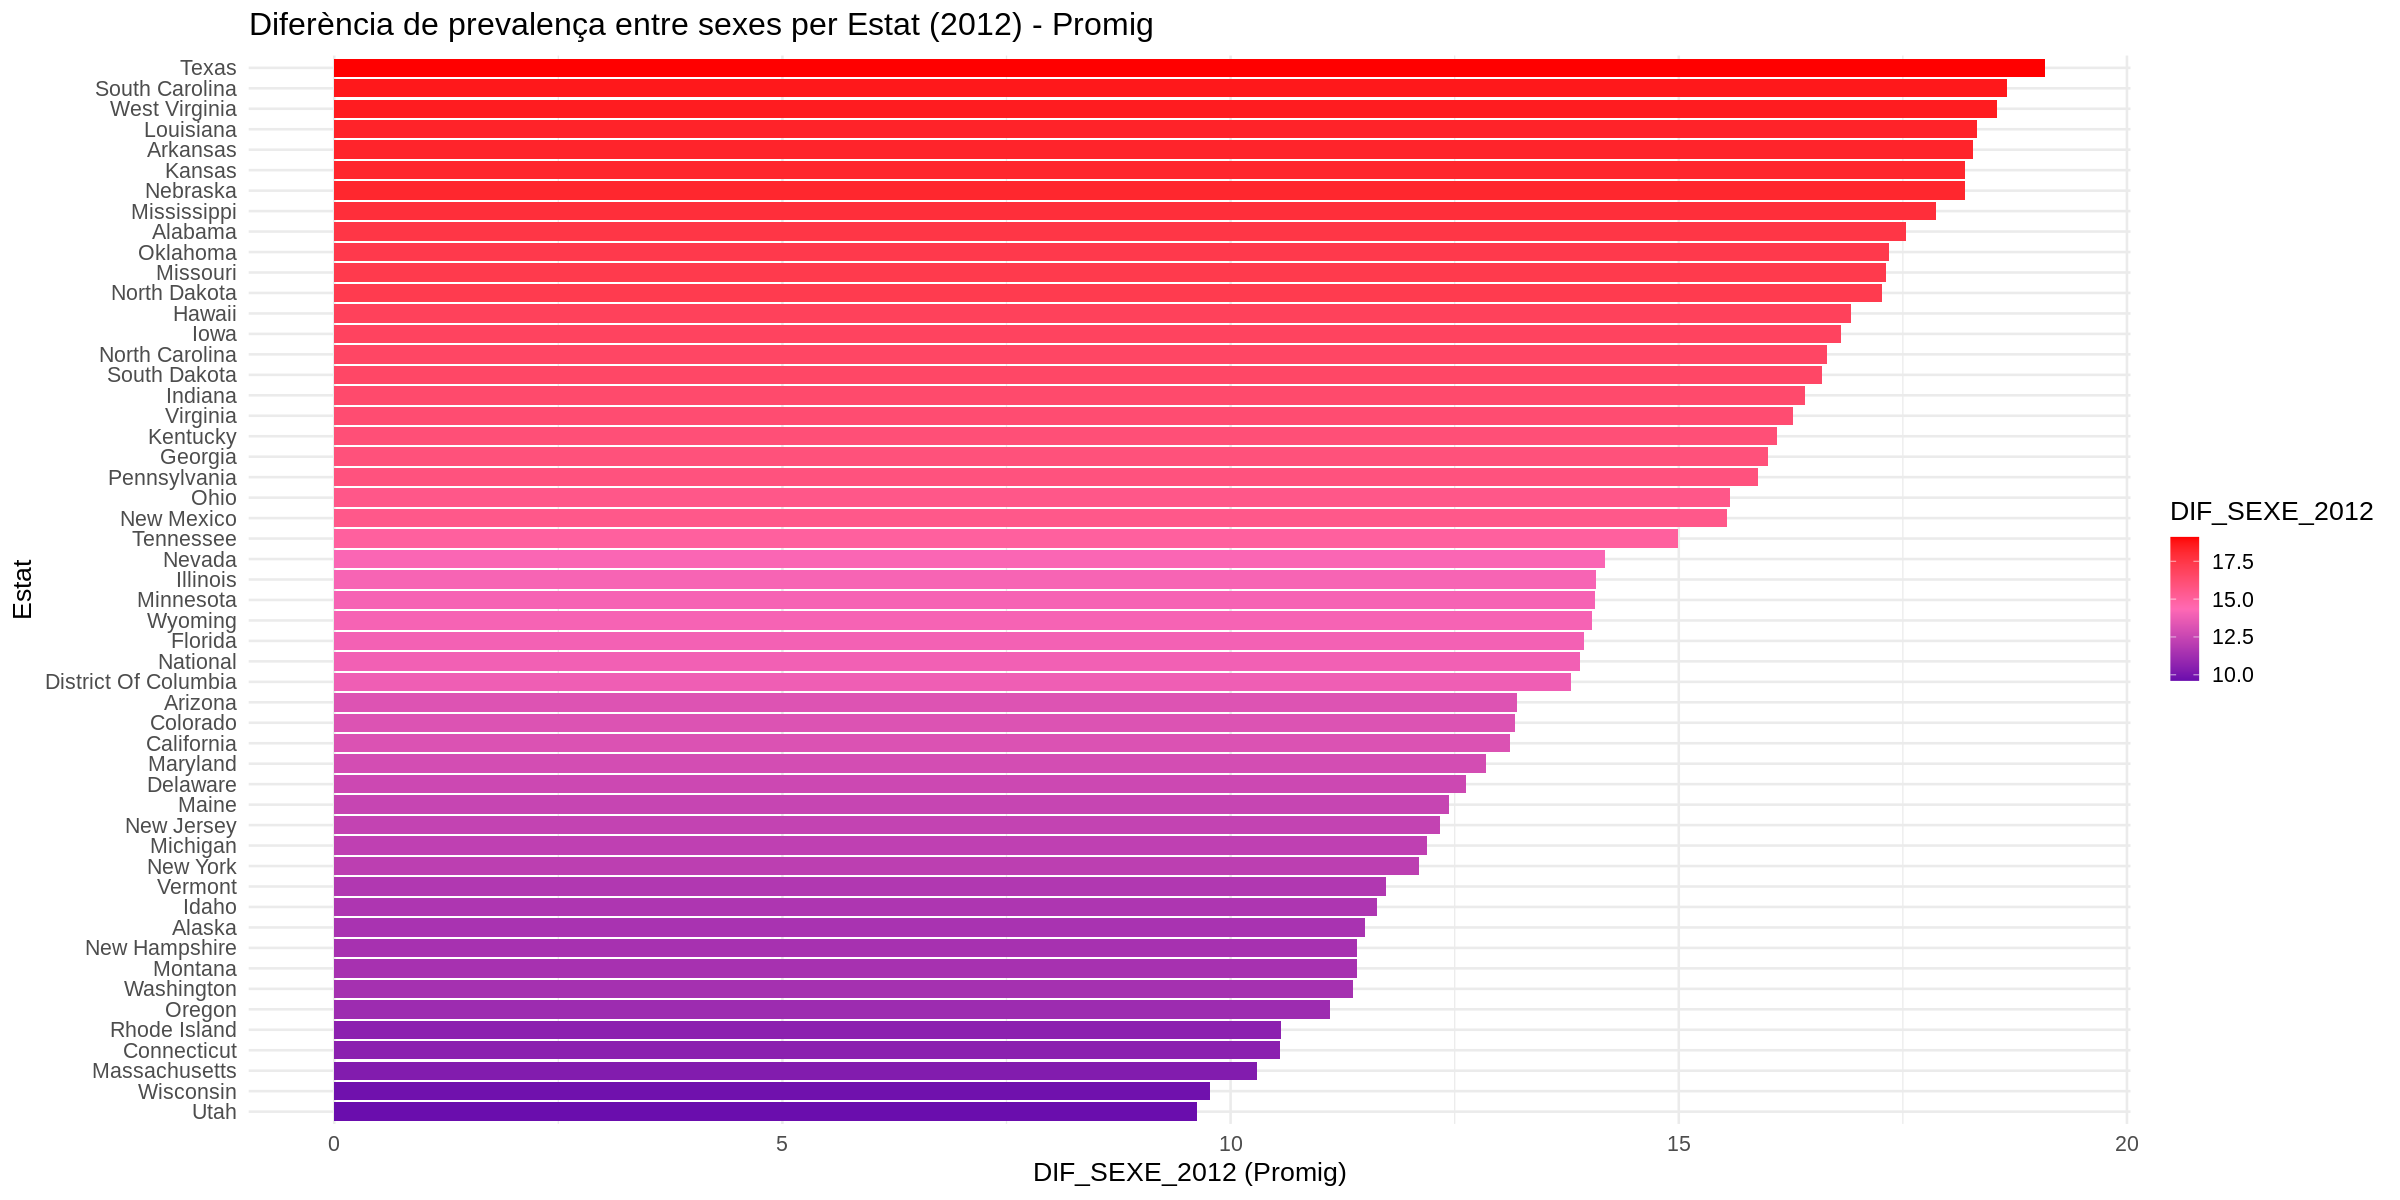

In [ ]:
# Ex. 1.2
# Agrupar por estado y calcular el promedio de DIF_SEXE_2012
df_state_avg <- df_final %>%
  group_by(state) %>%
  summarise(DIF_SEXE_2012 = mean(DIF_SEXE_2012, na.rm = TRUE))

options(repr.plot.width = 20, repr.plot.height = 10)

# Crear el gráfico
ggplot(df_state_avg, aes(x = reorder(state, DIF_SEXE_2012), y = DIF_SEXE_2012, fill = DIF_SEXE_2012)) +
  geom_col() +
  coord_flip() +
    scale_fill_gradientn(colors = c("#6a0dad", "#ff69b4", "#ff0000"),  # Morado a rojo
                       name = "DIF_SEXE_2012") +
  labs(title = "Diferència de prevalença entre sexes per Estat (2012) - Promig",
       x = "Estat",
       y = "DIF_SEXE_2012 (Promig)") +
  theme_minimal(base_size = 16)

In [ ]:
# Ex. 1.3:
    # i) Hi ha ubicacions (‘locations’) on les dones beguin més que els homes?
# Filtrem ubicacions on les dones bevien més que els homes
ubics_dones_mes <- df_final %>% filter(females_2012 > males_2012)
num_ubics <- nrow(ubics_dones_mes)
cat("Nombre de ubicacions on les dones bevien més que els homes:", num_ubics, "\n")
head(ubics_dones_mes, 5)

Nombre de ubicacions on les dones bevien més que els homes: 0 


state,location,both_sexes_2012,females_2012,males_2012,DIF_SEXE_2012
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>



Cinc localitzacions on els homes beuen bastant més que les dones (DIF_SEXE_2012 > 24):
[1] "Loving County"     "Adams County"      "Jefferson County" 
[4] "Kenedy County"     "St. Helena Parish"


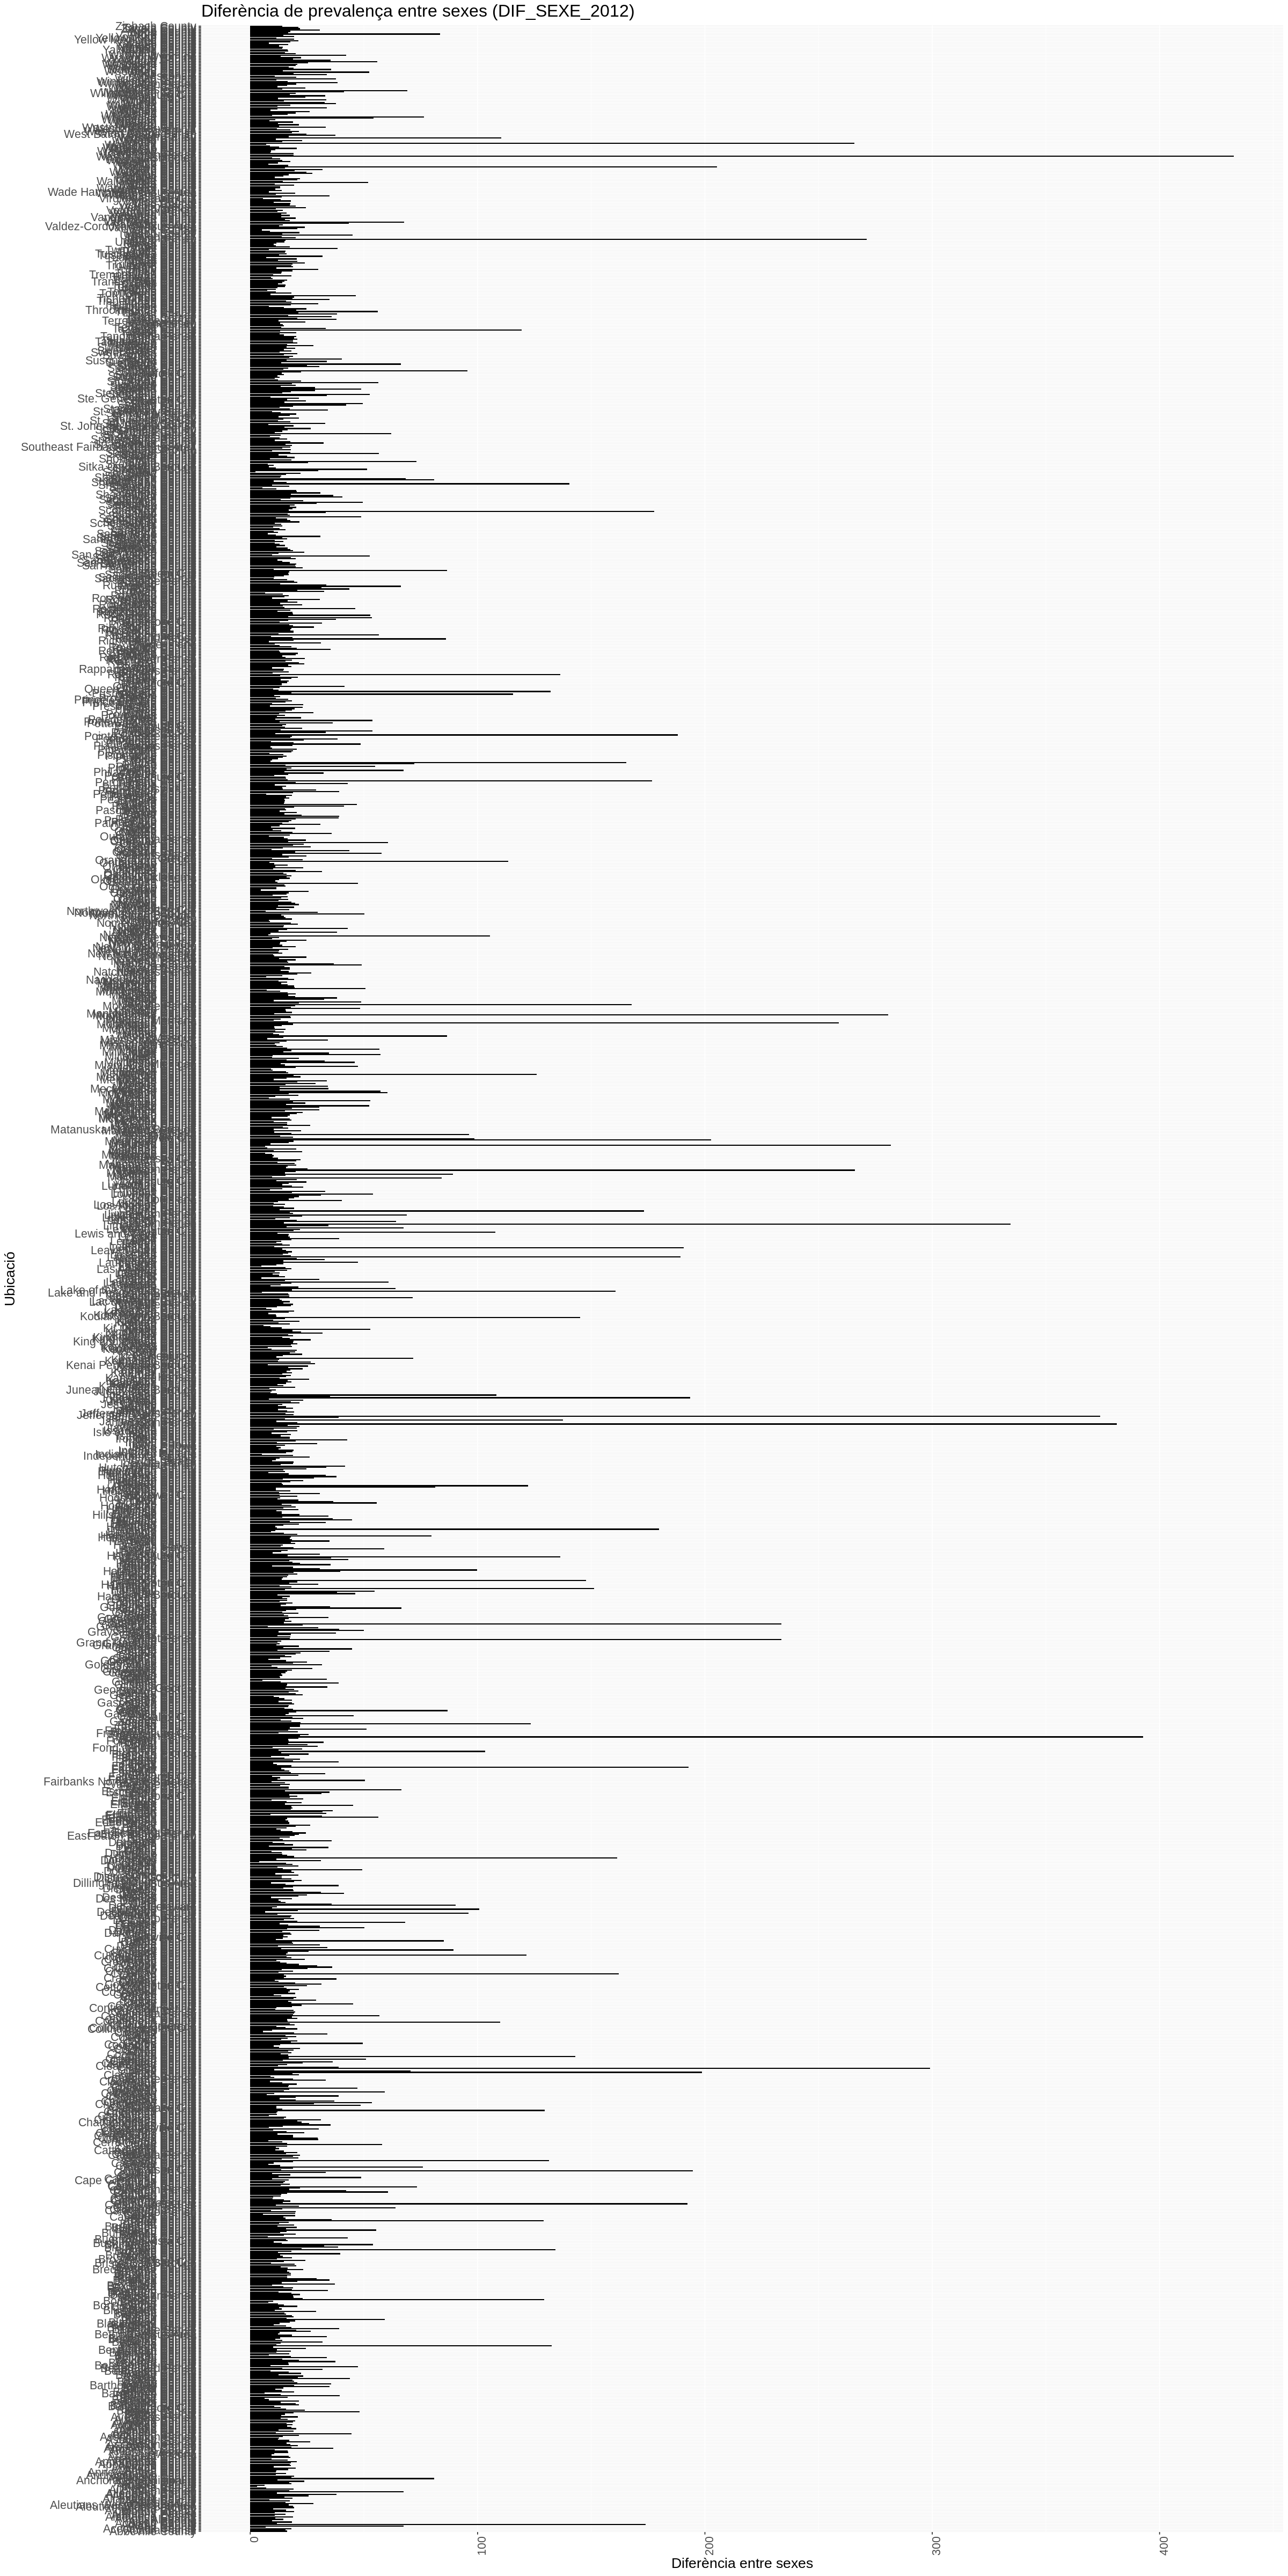

In [ ]:
# Ex. 1.3
    #ii) Feu una gràfica que compari les diferencies de la prevalença entre sexes (‘DIF_SEXE_2012’) en les respectives localitzacions. Anomeneu cinc
#localitzacions on els homes veuen bastant més que les dones, per exemple, amb una diferencia superior a 24

# Gràfica de la diferència entre sexes
ggplot(df_final, aes(x = location, y = DIF_SEXE_2012)) +
  geom_bar(stat = "identity", fill = "black") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 16)) +
  labs(
    title = "Diferència de prevalença entre sexes (DIF_SEXE_2012)",
    x = "Ubicació",
    y = "Diferència entre sexes"
  )


# Filtrar ubicacions on la diferència entre homes i dones és superior a 24
ubics_menys_dones <- df_final %>%
  filter(DIF_SEXE_2012 > 24)

# Mostrar cinc ubicacions amb la major diferència
top_5_ubicacions <- ubics_menys_dones %>%
  arrange(desc(DIF_SEXE_2012)) %>%
  head(5)

cat("\nCinc localitzacions on els homes beuen bastant més que les dones (DIF_SEXE_2012 > 24):\n")
print(top_5_ubicacions$location)

,state,location,both_sexes_2012,females_2012,males_2012,DIF_SEXE_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,California,Alpine County,61.4,59.9,63.0,3.1
2,California,Lassen County,57.8,55.4,60.3,4.9
3,Idaho,Madison County,11.0,8.7,13.3,4.6
4,Montana,Silver Bow County,61.4,60.3,62.6,2.3
5,Utah,Washington County,26.6,25.1,28.0,2.9


Nombre d' observacions: 10 


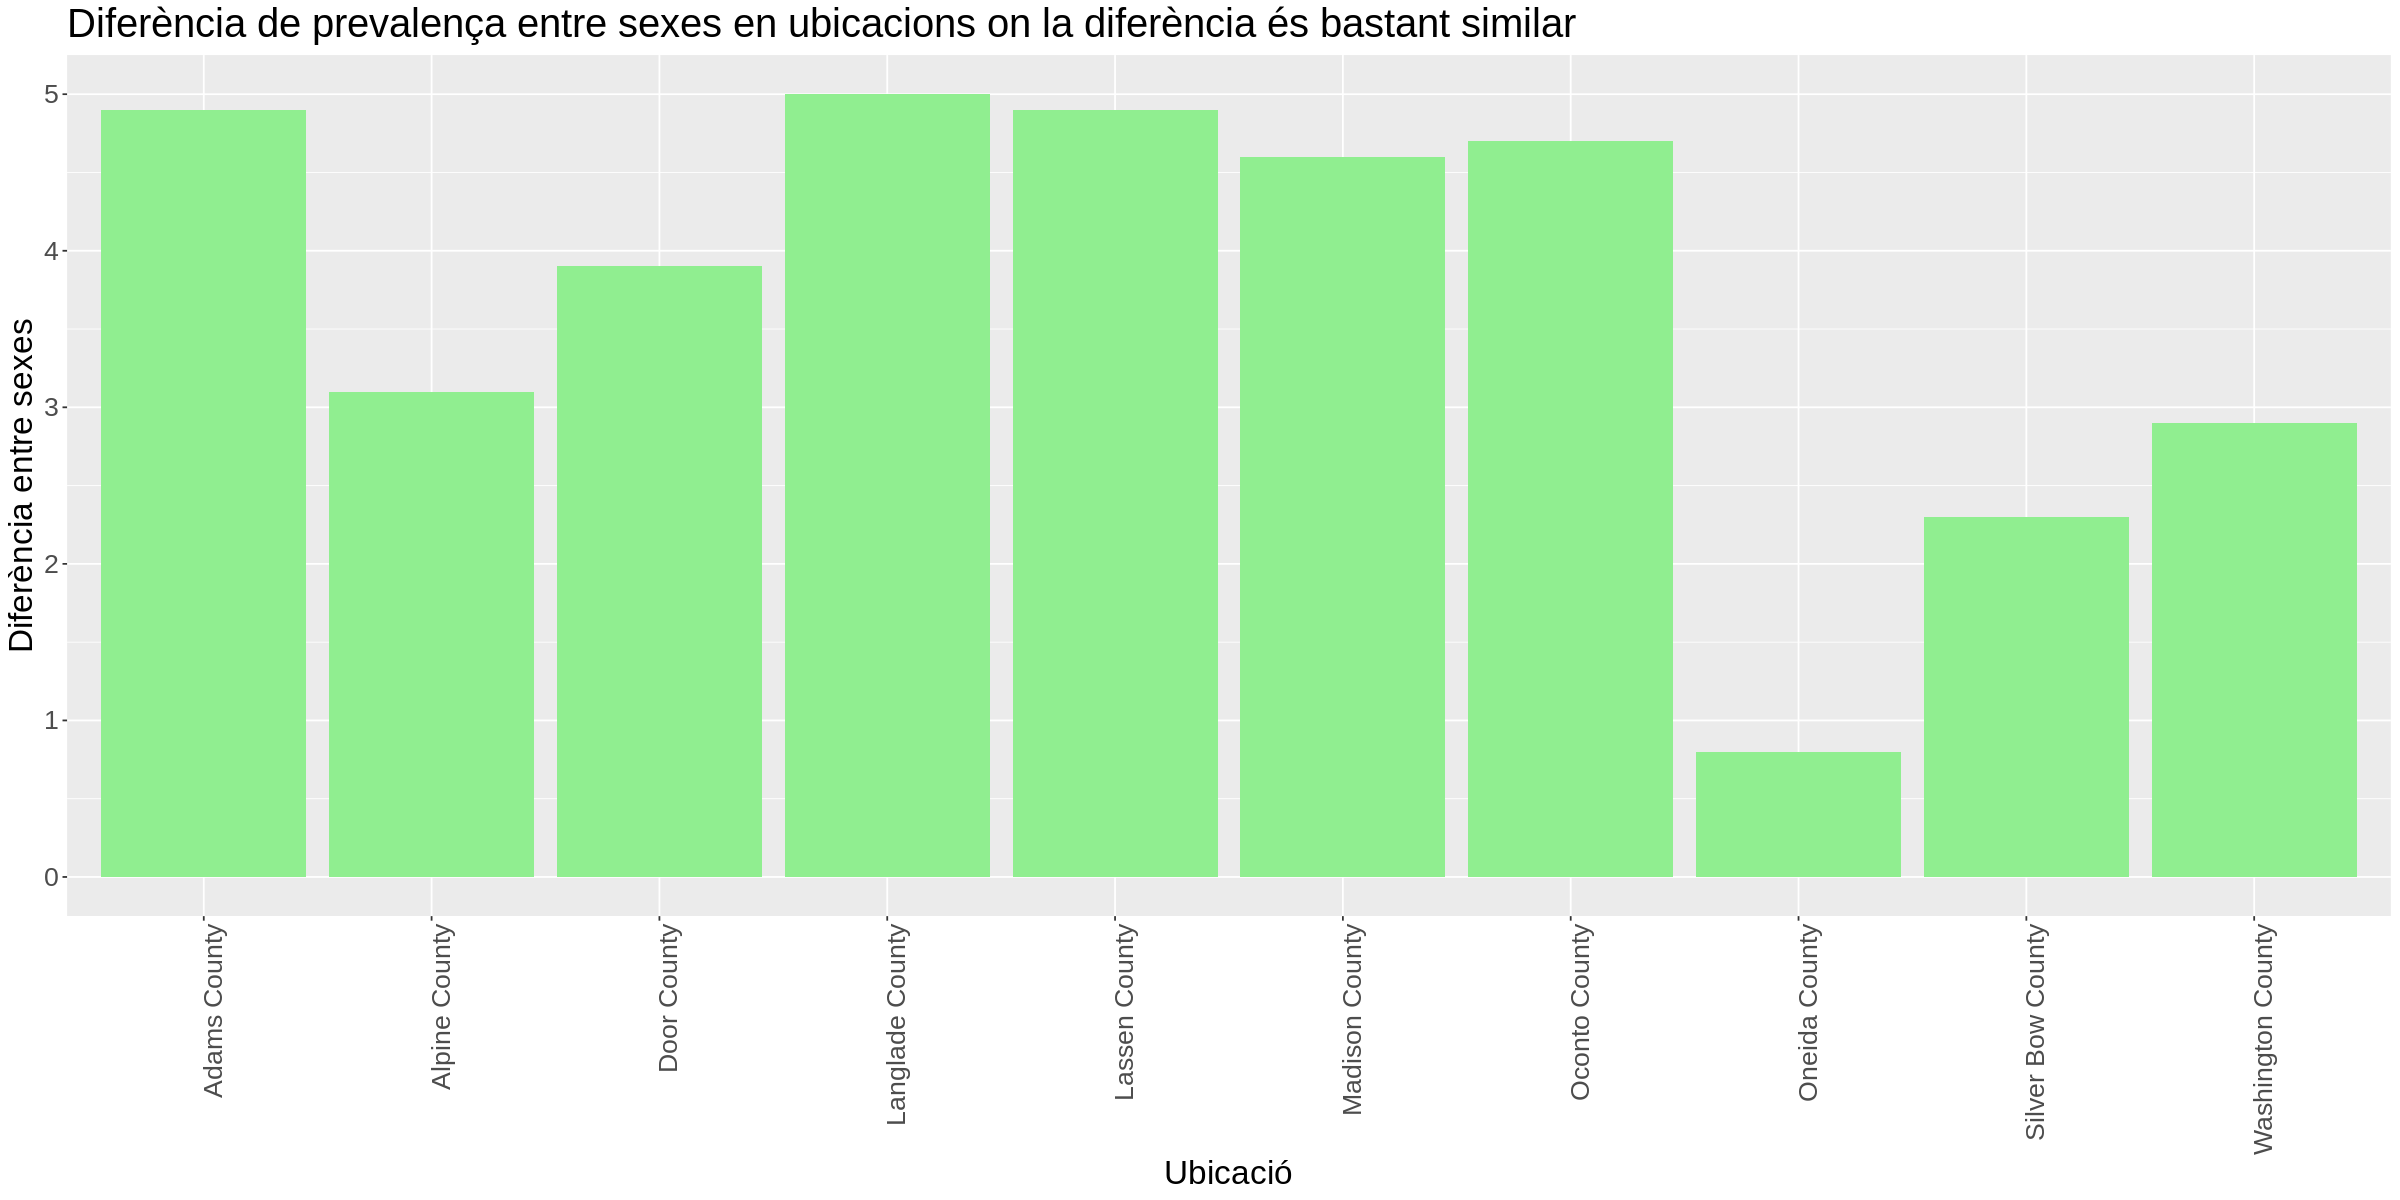

In [ ]:
# Ex. 1.3
    #iii)Quines són les ubicacions on la prevalença dels homes i dones és molt semblant? Feu un gràfic amb el que es pugui comparar les diferencies de la
#prevalença entre sexes en aquestes respectives ubicacions.

# Filtrar ubicacions on la diferència entre sexes és bastant similar (DIF_SEXE_2012 entre -5 i 5)
ubics_similar <- df_final %>%
  filter(DIF_SEXE_2012 >= -5 & DIF_SEXE_2012 <= 5)

# Visualitzar algunes de les primeres ubicacions
head(ubics_similar, 5)

# Gràfic per comparar les diferències de prevalença entre sexes en aquestes ubicacions
ggplot(ubics_similar, aes(x = location, y = DIF_SEXE_2012)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20)) +
  labs(
    title = "Diferència de prevalença entre sexes en ubicacions on la diferència és bastant similar",
    x = "Ubicació",
    y = "Diferència entre sexes"
  )

# Dimensions dataframe
num_obs <- nrow(ubics_similar)
cat("Nombre d' observacions:", num_obs, "\n")

PART 2

In [ ]:
# Ex. 2.1
install.packages("dplyr")
library("dplyr")
install.packages("tidyverse")
library(tidyverse)
data<-read_csv("binge_drinking.csv")
County_DATA<-data%>%filter(grepl("County",location))

# Dimensions dataframe
num_obs <- nrow(County_DATA)
num_vars <- ncol(County_DATA)
head(County_DATA, 5)
cat("Nombre d' observacions:", num_obs, "\n")
cat("Variables:", num_vars, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 3179 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): state, location
dbl (33): both_sexes_2002, females_2002, males_2002, both_sexes_2003, female...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


state,location,both_sexes_2002,females_2002,males_2002,both_sexes_2003,females_2003,males_2003,both_sexes_2004,females_2004,⋯,males_2009,both_sexes_2010,females_2010,males_2010,both_sexes_2011,females_2011,males_2011,both_sexes_2012,females_2012,males_2012
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,Autauga County,13.6,6.6,20.8,13.3,6.9,20.0,13.0,6.5,⋯,18.8,13.3,7.9,18.8,14.4,8.8,20.1,13.2,7.9,18.7
Alabama,Baldwin County,17.9,9.7,26.4,17.4,9.8,25.3,17.4,9.5,⋯,24.2,16.7,9.9,23.7,18.6,11.7,25.8,16.9,10.4,23.7
Alabama,Barbour County,12.8,5.4,20.4,12.5,5.6,19.6,12.1,5.2,⋯,18.3,12.7,5.9,19.8,13.5,6.3,21.0,12.4,5.4,19.6
Alabama,Bibb County,11.3,4.4,18.5,11.3,4.8,18.0,11.4,4.9,⋯,17.9,11.4,5.5,17.5,12.4,6.3,18.8,11.4,5.7,17.4
Alabama,Blount County,10.2,4.1,16.5,10.4,4.5,16.5,10.6,4.6,⋯,16.6,10.2,4.4,16.2,11.3,5.2,17.6,10.3,4.6,16.2


Nombre d' observacions: 3002 
Variables: 35 


In [ ]:
# Ex. 2.2
# Buscar la prevalença màxima de consumició excessiva a nivell d'estat el 2012
max_prevalença <- df_final %>%
  group_by(state) %>%
  summarise(max_prevalença_state = max(both_sexes_2012, na.rm = TRUE)) %>%
  arrange(desc(max_prevalença_state))

# Mostrar els 5 estats amb les màximes prevalències
top_5_estats <- head(max_prevalença, 5)

cat("Els 5 estats amb les màximes prevalències de consumició excessiva a nivell estatal (2012) són:\n")
print(top_5_estats)


Els 5 estats amb les màximes prevalències de consumició excessiva a nivell estatal (2012) són:
# A tibble: 5 × 2
  state      max_prevalença_state
  <chr>                     <dbl>
1 Virginia                   78.7
2 Colorado                   78.6
3 Wyoming                    74.9
4 Wisconsin                  73.3
5 Washington                 73.1


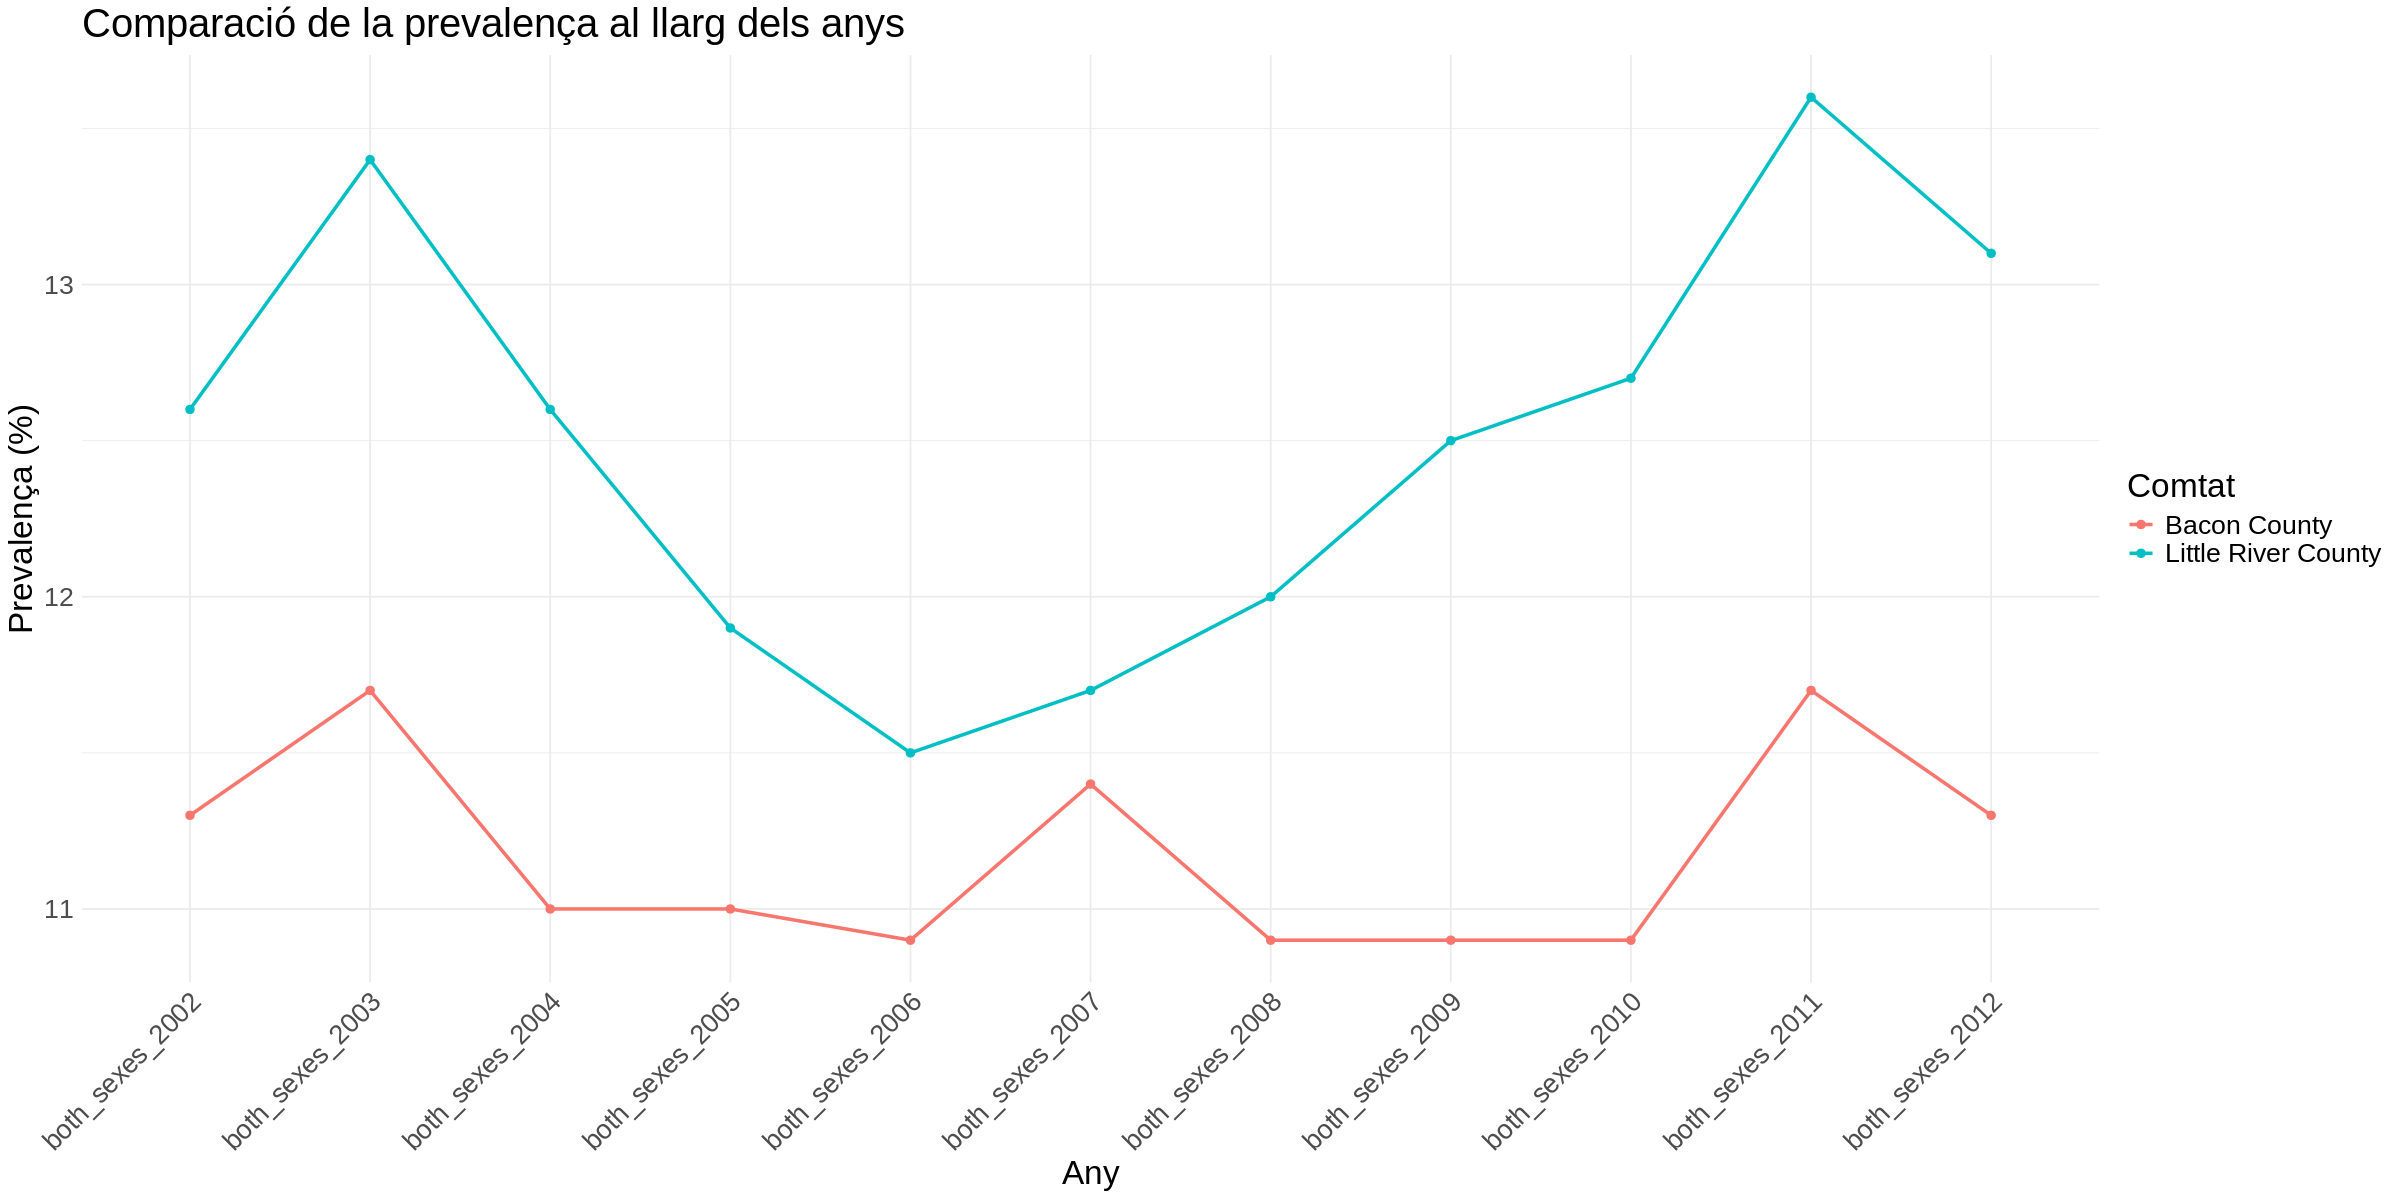

In [ ]:
# Ex. 2.3
dades_pivot <- data %>%
  pivot_longer(cols = c(3,6,9,12,15,18,21,24,27,30,33),
               names_to = "any",
               values_to = "prevalença",
               values_drop_na = FALSE)

dades_filtrades <- dades_pivot %>%
  filter(location %in% c("Little River County", "Bacon County"))

ggplot(dades_filtrades, aes(x = factor(any), y = prevalença, color = location, group = location)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Comparació de la prevalença al llarg dels anys",
       x = "Any",
       y = "Prevalença (%)",
       color = "Comtat"
    ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 20))

,state,location,both_sexes_2002,females_2002,males_2002,both_sexes_2003,females_2003,males_2003,both_sexes_2004,females_2004,⋯,males_2009,both_sexes_2010,females_2010,males_2010,both_sexes_2011,females_2011,males_2011,both_sexes_2012,females_2012,males_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,United States,17.3,10.8,24.1,17.8,11.2,24.7,17.1,10.7,⋯,23.8,17.8,11.8,24.0,19.0,12.8,25.6,18.3,12.4,24.5
2,Alabama,Alabama,13.2,6.3,20.4,13.1,6.6,19.8,13.2,6.7,⋯,19.4,13.4,7.8,19.1,14.7,8.9,20.7,13.4,7.9,19.1
3,Alabama,Autauga County,13.6,6.6,20.8,13.3,6.9,20.0,13.0,6.5,⋯,18.8,13.3,7.9,18.8,14.4,8.8,20.1,13.2,7.9,18.7
4,Alabama,Baldwin County,17.9,9.7,26.4,17.4,9.8,25.3,17.4,9.5,⋯,24.2,16.7,9.9,23.7,18.6,11.7,25.8,16.9,10.4,23.7
5,Alabama,Barbour County,12.8,5.4,20.4,12.5,5.6,19.6,12.1,5.2,⋯,18.3,12.7,5.9,19.8,13.5,6.3,21.0,12.4,5.4,19.6


,state,location,both_sexes_2002,females_2002,males_2002,both_sexes_2003,females_2003,males_2003,both_sexes_2004,females_2004,⋯,males_2009,both_sexes_2010,females_2010,males_2010,both_sexes_2011,females_2011,males_2011,both_sexes_2012,females_2012,males_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,United States,55.4,47.5,63.7,56.6,48.9,64.6,55.2,47.6,⋯,63.3,56.1,49.3,63.2,57.1,50.6,63.9,56.0,49.1,63.0
2,Alabama,Alabama,40.7,32.1,49.6,42.3,33.8,51.2,41.0,32.9,⋯,49.0,42.5,35.3,50.1,44.8,37.3,52.5,43.6,36.5,51.0
3,Alabama,Autauga County,39.4,29.4,49.7,40.6,31.0,50.6,39.2,30.1,⋯,49.2,42.5,34.4,50.9,43.6,35.4,52.0,42.5,34.4,50.9
4,Alabama,Baldwin County,54.0,45.7,62.5,54.9,47.0,63.2,53.1,45.2,⋯,61.5,54.6,47.3,62.1,57.0,50.0,64.3,55.7,48.8,62.8
5,Alabama,Barbour County,36.0,27.3,45.0,37.9,29.2,46.9,35.8,27.4,⋯,43.5,38.6,30.2,47.4,39.4,31.0,48.2,37.6,29.2,46.3


,state,location,both_sexes_2012,females_2012,males_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,National,United States,56.0,49.1,63.0
2,Alabama,Alabama,43.6,36.5,51.0
3,Alabama,Autauga County,42.5,34.4,50.9
4,Alabama,Baldwin County,55.7,48.8,62.8
5,Alabama,Barbour County,37.6,29.2,46.3


Nombre d' observacions: 3179 
Variables: 5 


,state,location,both_sexes_2012,females_2012,males_2012,DIF_SEXE_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,National,United States,56.0,49.1,63.0,13.9
2,Alabama,Alabama,43.6,36.5,51.0,14.5
3,Alabama,Autauga County,42.5,34.4,50.9,16.5
4,Alabama,Baldwin County,55.7,48.8,62.8,14.0
5,Alabama,Barbour County,37.6,29.2,46.3,17.1


Nombre d' observacions: 3169 
Variables: 6 
Nombre de ubicacions on les dones bevien més que els homes: 0 


state,location,both_sexes_2012,females_2012,males_2012,DIF_SEXE_2012
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


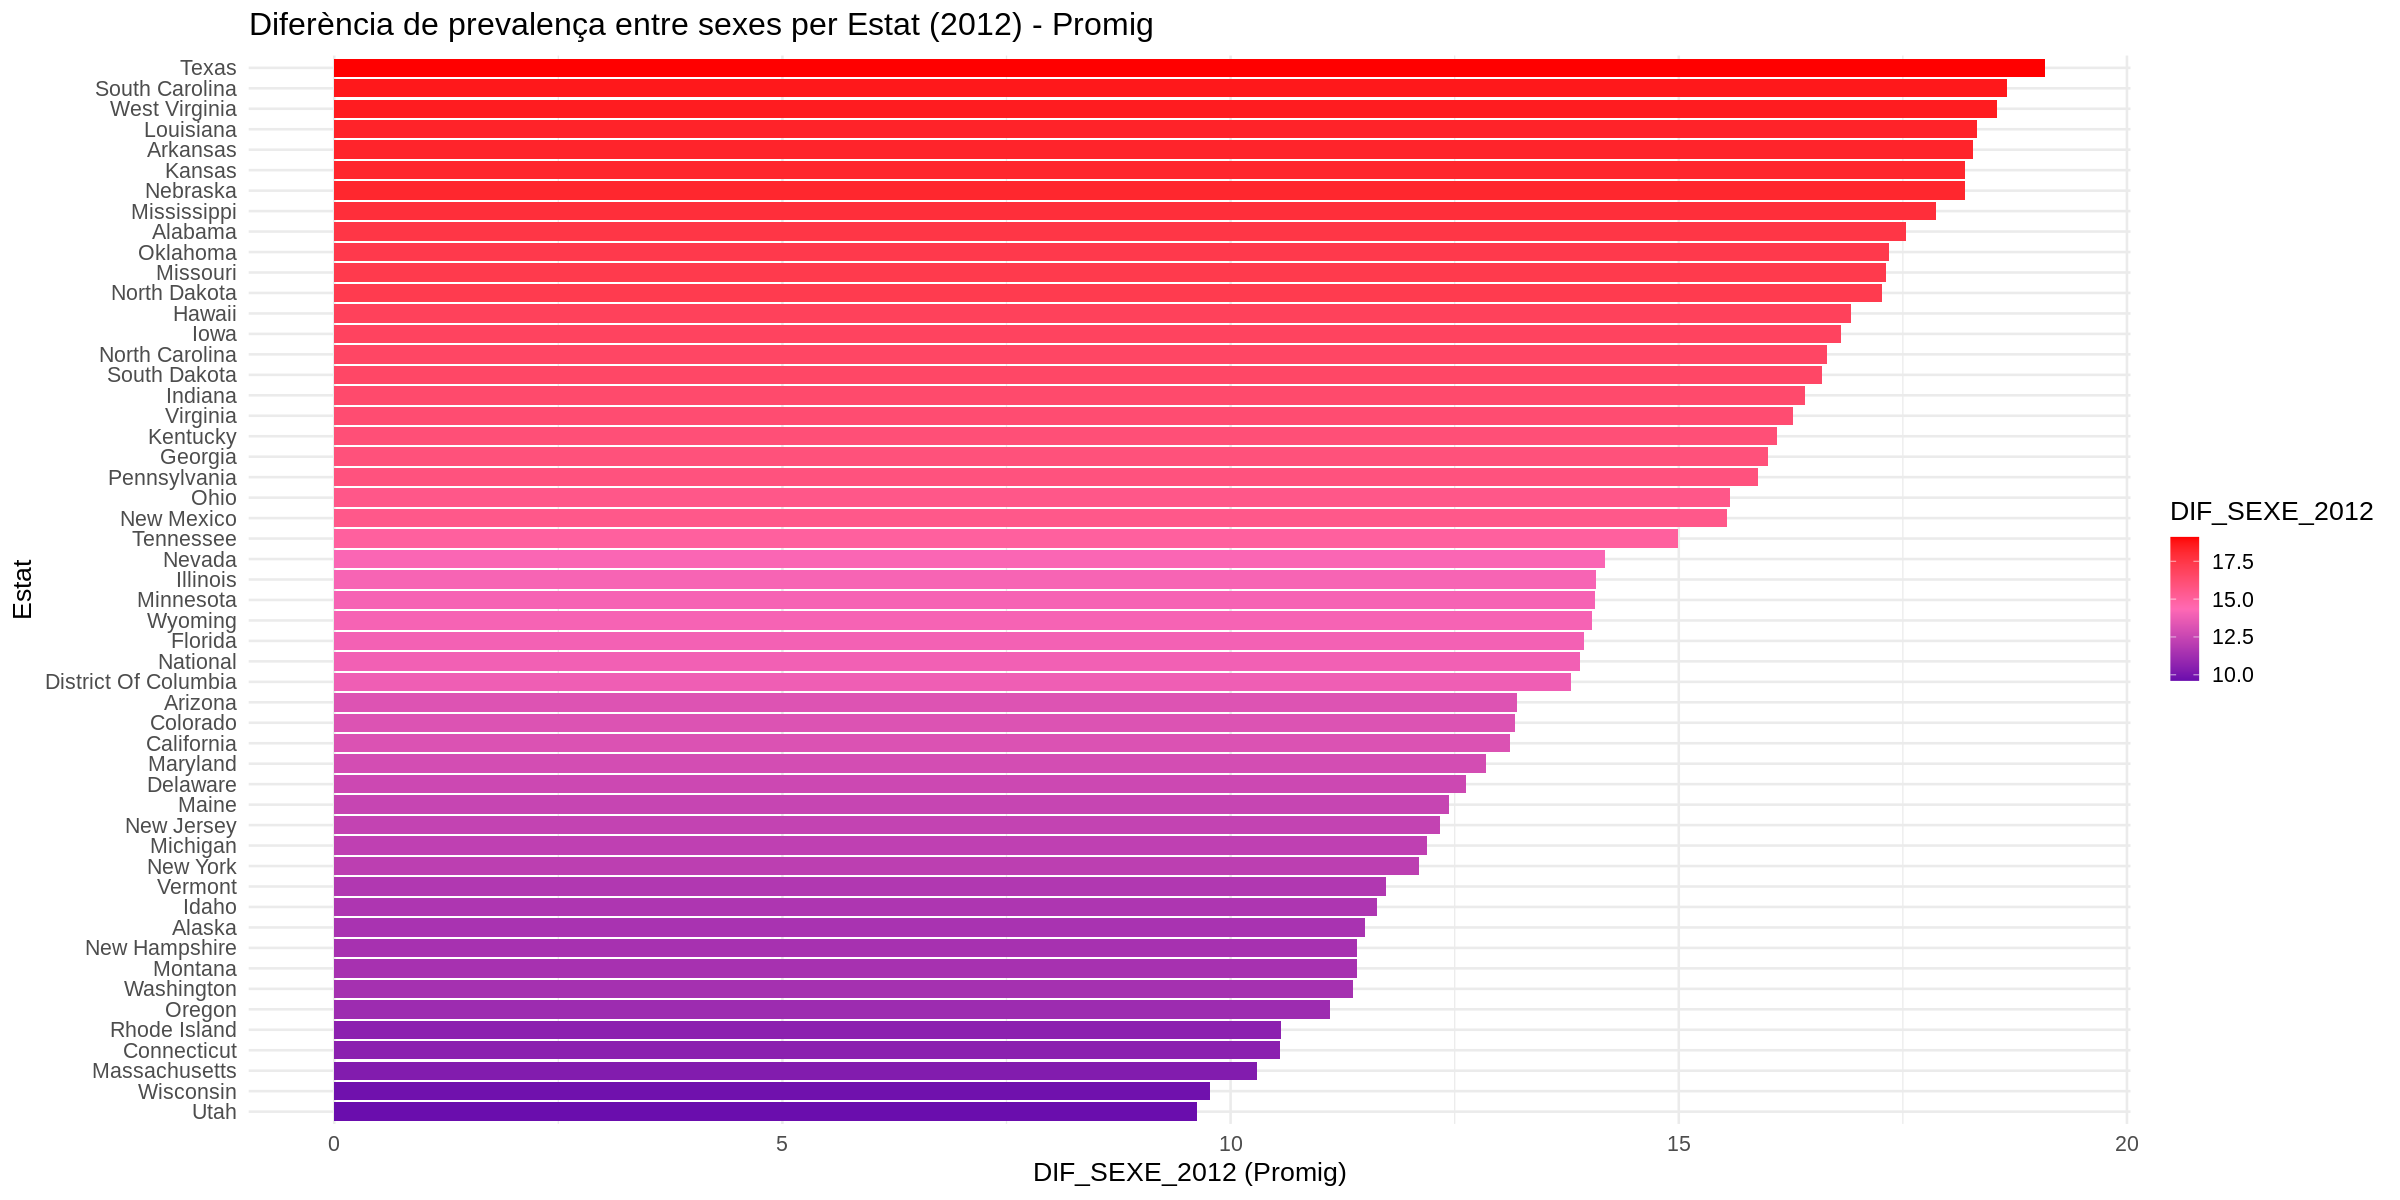


Cinc localitzacions on els homes beuen bastant més que les dones (DIF_SEXE_2012 > 24):
[1] "Loving County"     "Adams County"      "Jefferson County" 
[4] "Kenedy County"     "St. Helena Parish"


,state,location,both_sexes_2012,females_2012,males_2012,DIF_SEXE_2012
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,California,Alpine County,61.4,59.9,63.0,3.1
2,California,Lassen County,57.8,55.4,60.3,4.9
3,Idaho,Madison County,11.0,8.7,13.3,4.6
4,Montana,Silver Bow County,61.4,60.3,62.6,2.3
5,Utah,Washington County,26.6,25.1,28.0,2.9


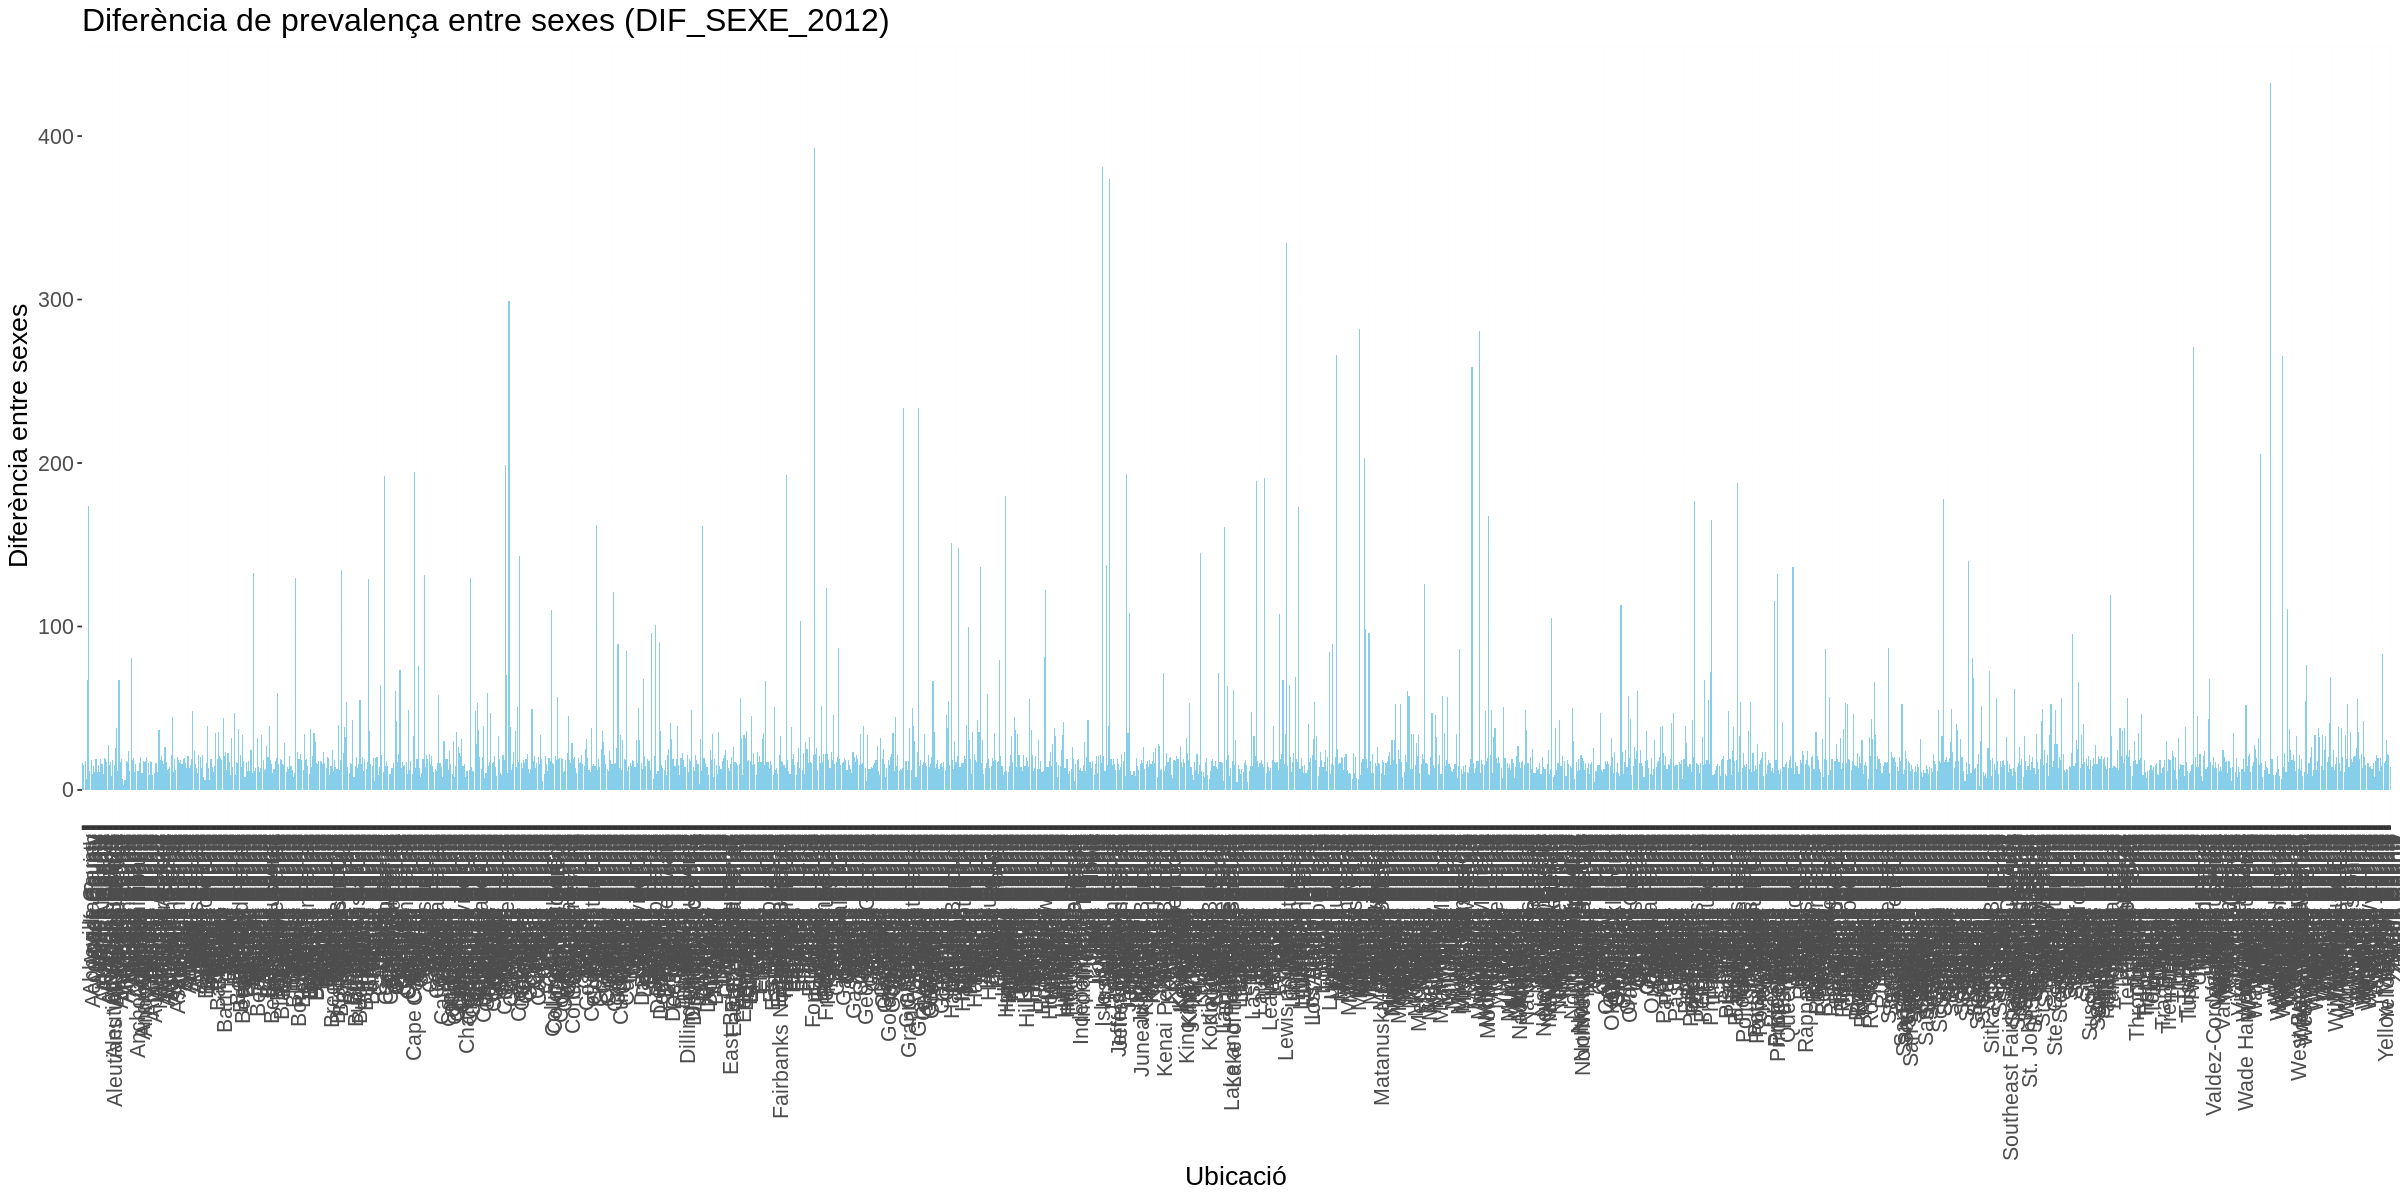

Nombre d' observacions: 10 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 3179 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): state, location
dbl (33): both_sexes_2002, females_2002, males_2002, both_sexes_2003, female...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


state,location,both_sexes_2002,females_2002,males_2002,both_sexes_2003,females_2003,males_2003,both_sexes_2004,females_2004,⋯,males_2009,both_sexes_2010,females_2010,males_2010,both_sexes_2011,females_2011,males_2011,both_sexes_2012,females_2012,males_2012
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,Autauga County,13.6,6.6,20.8,13.3,6.9,20.0,13.0,6.5,⋯,18.8,13.3,7.9,18.8,14.4,8.8,20.1,13.2,7.9,18.7
Alabama,Baldwin County,17.9,9.7,26.4,17.4,9.8,25.3,17.4,9.5,⋯,24.2,16.7,9.9,23.7,18.6,11.7,25.8,16.9,10.4,23.7
Alabama,Barbour County,12.8,5.4,20.4,12.5,5.6,19.6,12.1,5.2,⋯,18.3,12.7,5.9,19.8,13.5,6.3,21.0,12.4,5.4,19.6
Alabama,Bibb County,11.3,4.4,18.5,11.3,4.8,18.0,11.4,4.9,⋯,17.9,11.4,5.5,17.5,12.4,6.3,18.8,11.4,5.7,17.4
Alabama,Blount County,10.2,4.1,16.5,10.4,4.5,16.5,10.6,4.6,⋯,16.6,10.2,4.4,16.2,11.3,5.2,17.6,10.3,4.6,16.2


Nombre d' observacions: 3002 
Variables: 35 
Els 5 estats amb les màximes prevalències de consumició excessiva a nivell estatal (2012) són:
# A tibble: 5 × 2
  state      max_prevalença_state
  <chr>                     <dbl>
1 Virginia                   78.7
2 Colorado                   78.6
3 Wyoming                    74.9
4 Wisconsin                  73.3
5 Washington                 73.1


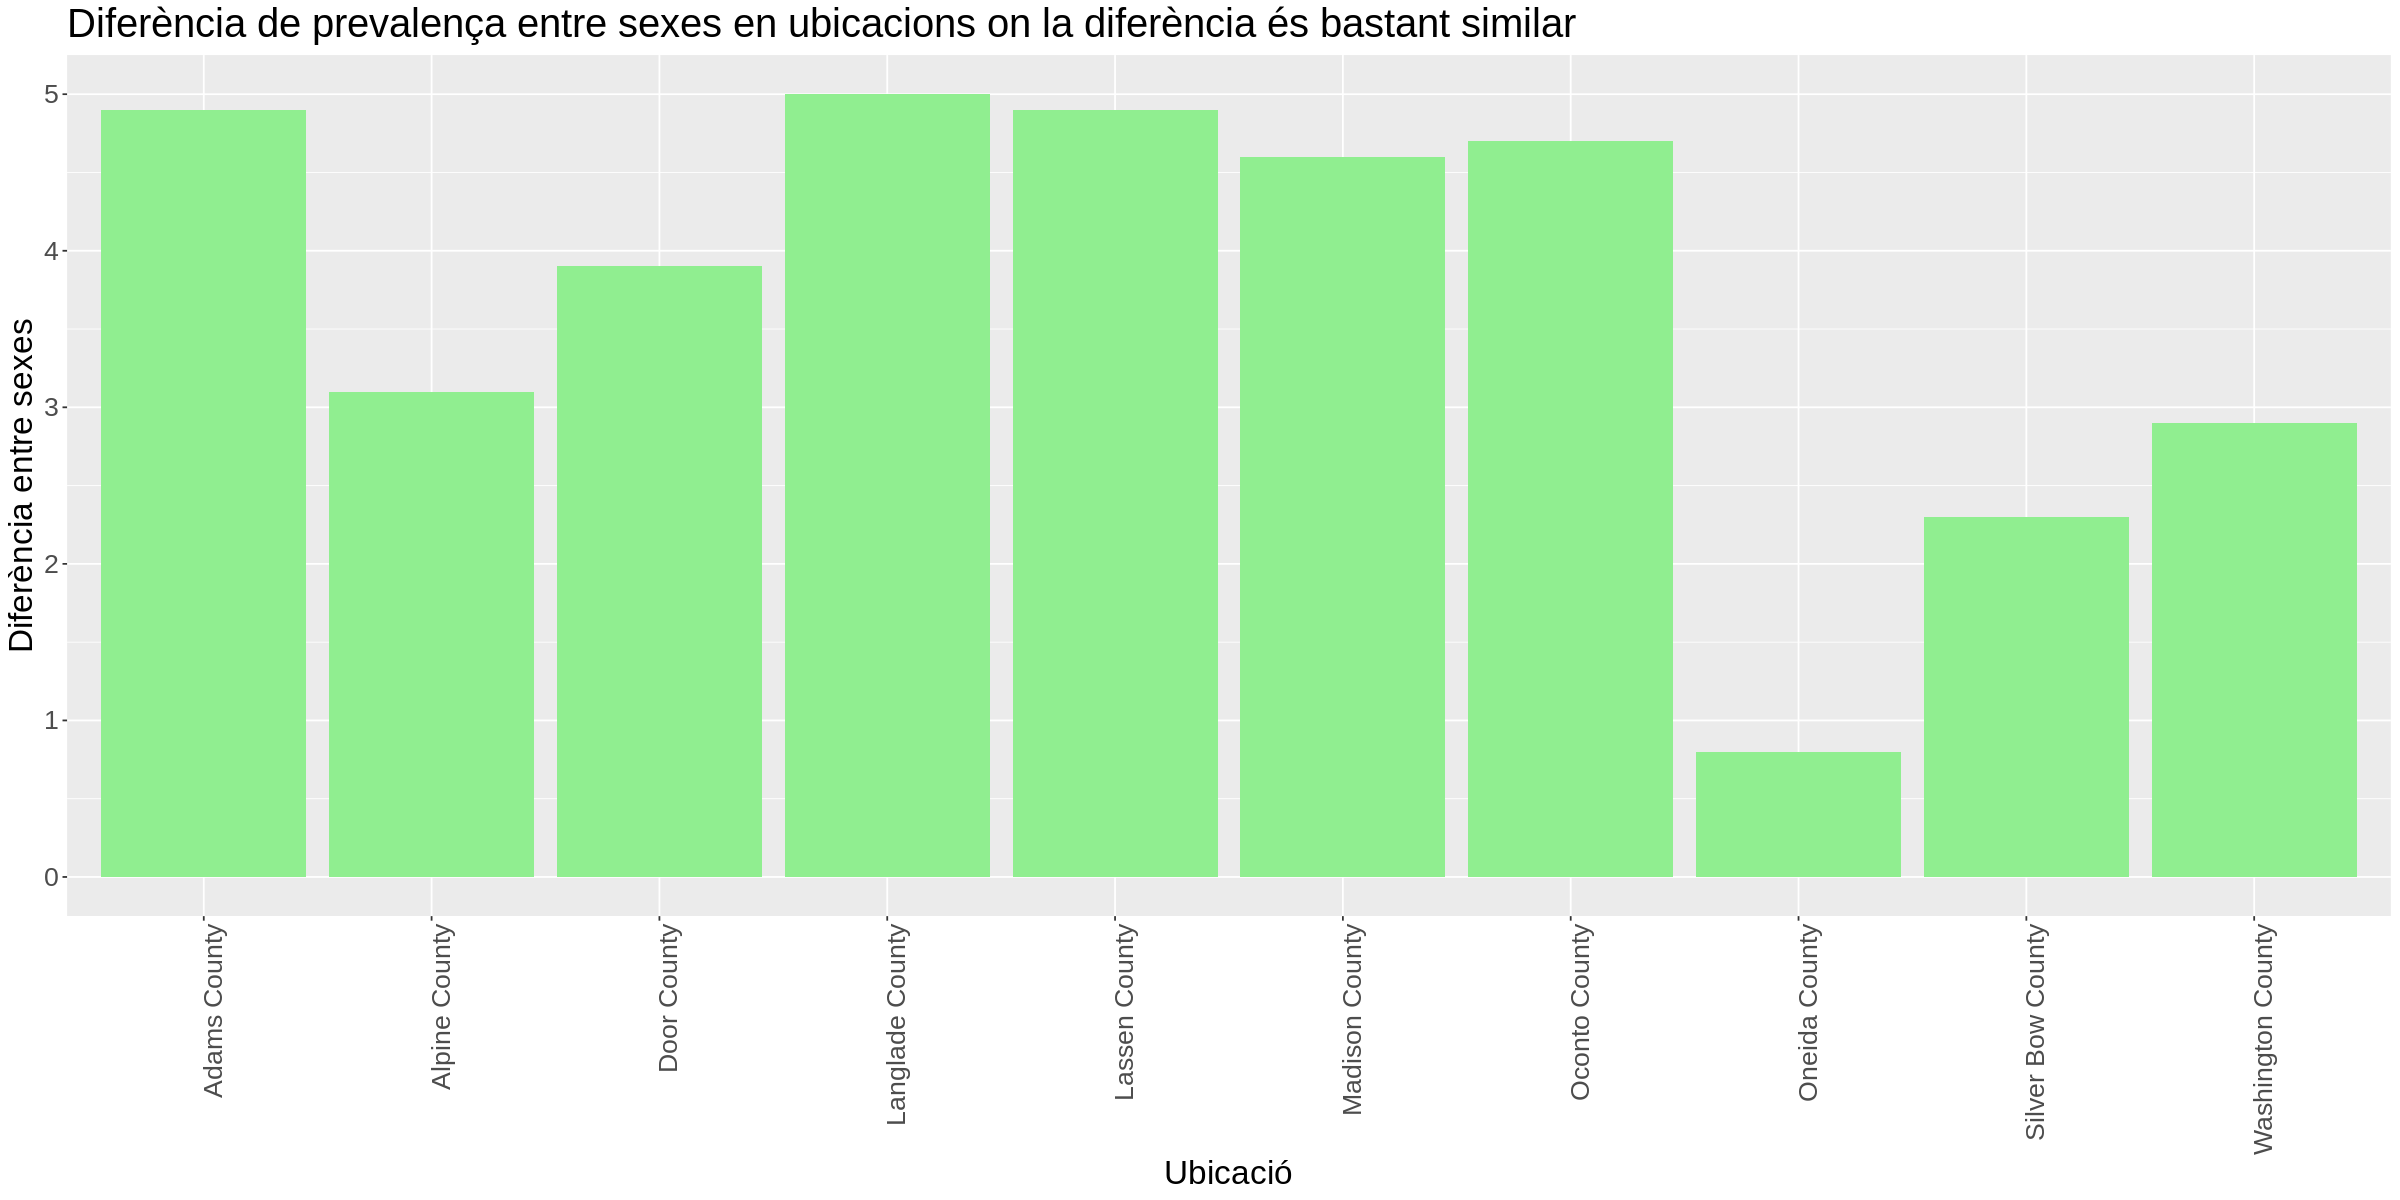

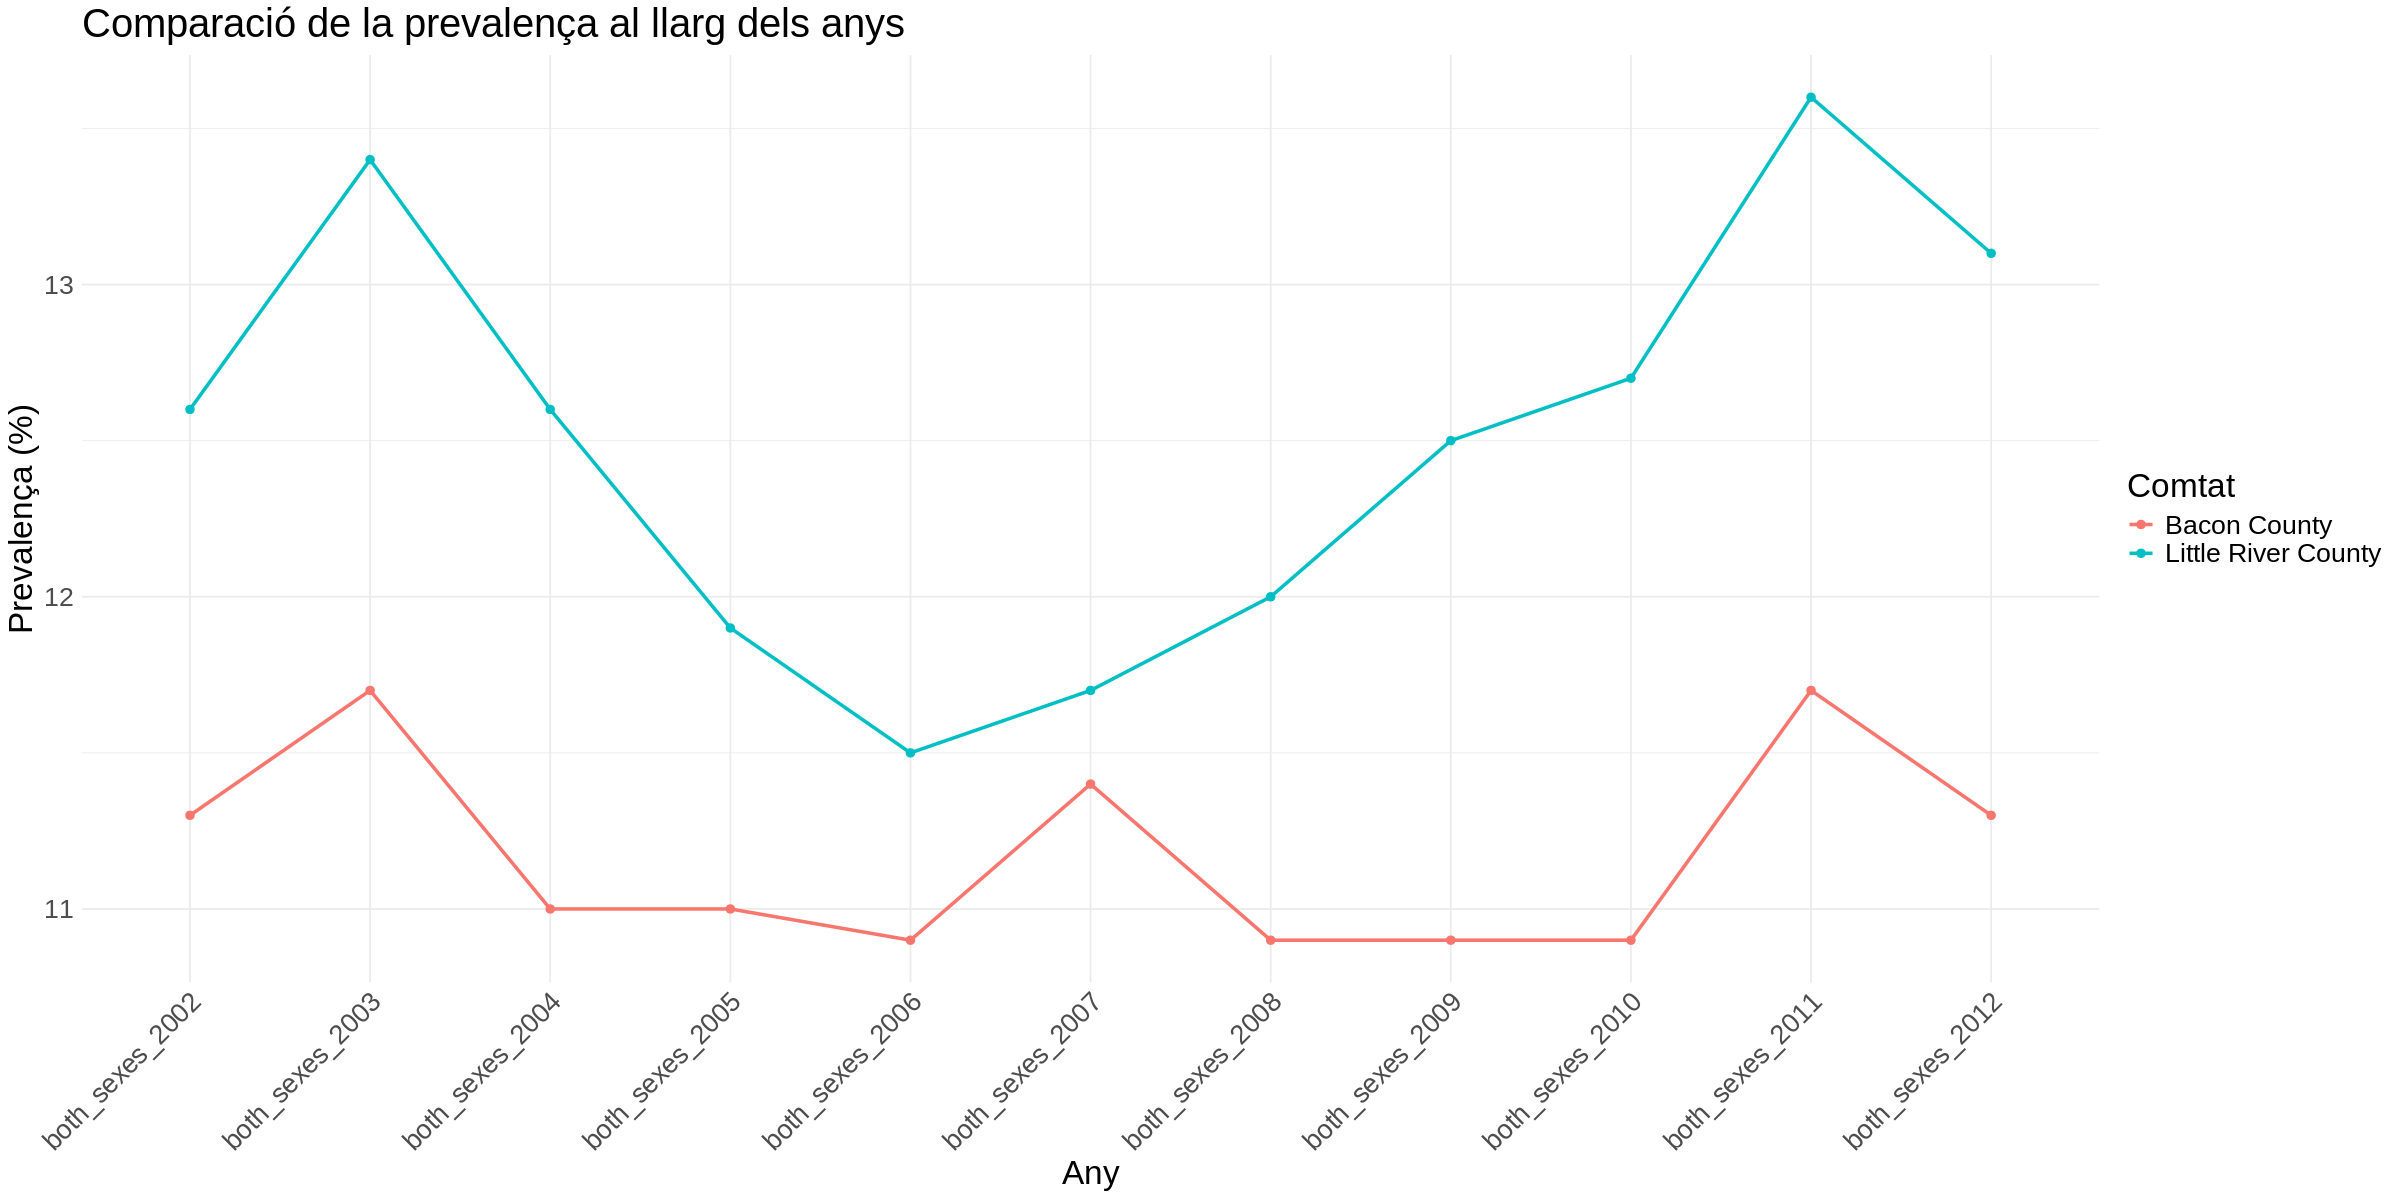

In [ ]:
### Ignorar ###
library(ggplot2)
library(dplyr)

binge = read.csv("binge_drinking.csv")
any_drinking = data = read.csv("any_drinking.csv")

head(binge, 5)
head(any_drinking, 5)

# Ex. 1.1:  Extraieu el dataframe amb columnes ‘estat (State)’ i ‘ubicació (location)’ que
# contingui tota la informació referent a l’any 2012

any_2012 <- any_drinking[, c("state", "location", "both_sexes_2012", "females_2012", "males_2012")]

head(any_2012, 5)

# Dimensions dataframe
num_obs <- nrow(any_2012)
num_vars <- ncol(any_2012)
cat("Nombre d' observacions:", num_obs, "\n")
cat("Variables:", num_vars, "\n")

# Ex. 1.2: Columna amb la diferencia entre la prevalença corresponent al genere masculí i al femení. No valors NA's.
df_final <- any_2012 %>%
  mutate(DIF_SEXE_2012 = males_2012 - females_2012) %>%
  na.omit()

# Dimensions dataframe
num_obs <- nrow(df_final)
num_vars <- ncol(df_final)
head(df_final, 5)
cat("Nombre d' observacions:", num_obs, "\n")
cat("Variables:", num_vars, "\n")

# Ex. 1.2
# Agrupar por estado y calcular el promedio de DIF_SEXE_2012
df_state_avg <- df_final %>%
  group_by(state) %>%
  summarise(DIF_SEXE_2012 = mean(DIF_SEXE_2012, na.rm = TRUE))

options(repr.plot.width = 20, repr.plot.height = 10)

# Crear el gráfico
ggplot(df_state_avg, aes(x = reorder(state, DIF_SEXE_2012), y = DIF_SEXE_2012, fill = DIF_SEXE_2012)) +
  geom_col() +
  coord_flip() +
    scale_fill_gradientn(colors = c("#6a0dad", "#ff69b4", "#ff0000"),  # Morado a rojo
                       name = "DIF_SEXE_2012") +
  labs(title = "Diferència de prevalença entre sexes per Estat (2012) - Promig",
       x = "Estat",
       y = "DIF_SEXE_2012 (Promig)") +
  theme_minimal(base_size = 16)

# Ex. 1.3:
    # i) Hi ha ubicacions (‘locations’) on les dones beguin més que els homes?
# Filtrem ubicacions on les dones bevien més que els homes
ubics_dones_mes <- df_final %>% filter(females_2012 > males_2012)
num_ubics <- nrow(ubics_dones_mes)
cat("Nombre de ubicacions on les dones bevien més que els homes:", num_ubics, "\n")
head(ubics_dones_mes, 5)

# Ex. 1.3
    #ii) Feu una gràfica que compari les diferencies de la prevalença entre sexes (‘DIF_SEXE_2012’) en les respectives localitzacions. Anomeneu cinc
#localitzacions on els homes veuen bastant més que les dones, per exemple, amb una diferencia superior a 24

# Gràfica de la diferència entre sexes
ggplot(df_final, aes(x = location, y = DIF_SEXE_2012)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 16)) +
  labs(
    title = "Diferència de prevalença entre sexes (DIF_SEXE_2012)",
    x = "Ubicació",
    y = "Diferència entre sexes"
  )

# Filtrar ubicacions on la diferència entre homes i dones és superior a 24
ubics_menys_dones <- df_final %>%
  filter(DIF_SEXE_2012 > 24)

# Mostrar cinc ubicacions amb la major diferència
top_5_ubicacions <- ubics_menys_dones %>%
  arrange(desc(DIF_SEXE_2012)) %>%
  head(5)

cat("\nCinc localitzacions on els homes beuen bastant més que les dones (DIF_SEXE_2012 > 24):\n")
print(top_5_ubicacions$location)

# Ex. 1.3
    #iii)Quines són les ubicacions on la prevalença dels homes i dones és molt semblant? Feu un gràfic amb el que es pugui comparar les diferencies de la
#prevalença entre sexes en aquestes respectives ubicacions.

# Filtrar ubicacions on la diferència entre sexes és bastant similar (DIF_SEXE_2012 entre -5 i 5)
ubics_similar <- df_final %>%
  filter(DIF_SEXE_2012 >= -5 & DIF_SEXE_2012 <= 5)

# Visualitzar algunes de les primeres ubicacions
head(ubics_similar, 5)

# Gràfic per comparar les diferències de prevalença entre sexes en aquestes ubicacions
ggplot(ubics_similar, aes(x = location, y = DIF_SEXE_2012)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), text = element_text(size = 20)) +
  labs(
    title = "Diferència de prevalença entre sexes en ubicacions on la diferència és bastant similar",
    x = "Ubicació",
    y = "Diferència entre sexes"
  )

# Dimensions dataframe
num_obs <- nrow(ubics_similar)
cat("Nombre d' observacions:", num_obs, "\n")

# Ex. 2.1
install.packages("dplyr")
library("dplyr")
install.packages("tidyverse")
library(tidyverse)
data<-read_csv("binge_drinking.csv")
County_DATA<-data%>%filter(grepl("County",location))

# Dimensions dataframe
num_obs <- nrow(County_DATA)
num_vars <- ncol(County_DATA)
head(County_DATA, 5)
cat("Nombre d' observacions:", num_obs, "\n")
cat("Variables:", num_vars, "\n")

# Ex. 2.2
# Buscar la prevalença màxima de consumició excessiva a nivell d'estat el 2012
max_prevalença <- df_final %>%
  group_by(state) %>%
  summarise(max_prevalença_state = max(both_sexes_2012, na.rm = TRUE)) %>%
  arrange(desc(max_prevalença_state))

# Mostrar els 5 estats amb les màximes prevalències
top_5_estats <- head(max_prevalença, 5)

cat("Els 5 estats amb les màximes prevalències de consumició excessiva a nivell estatal (2012) són:\n")
print(top_5_estats)

# Ex. 2.3
dades_pivot <- data %>%
  pivot_longer(cols = c(3,6,9,12,15,18,21,24,27,30,33),
               names_to = "any",
               values_to = "prevalença",
               values_drop_na = FALSE)

dades_filtrades <- dades_pivot %>%
  filter(location %in% c("Little River County", "Bacon County"))

ggplot(dades_filtrades, aes(x = factor(any), y = prevalença, color = location, group = location)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Comparació de la prevalença al llarg dels anys",
       x = "Any",
       y = "Prevalença (%)",
       color = "Comtat"
    ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 20))